## Append the path of the module installed to sys ("use this when you get error Module not found even after installing package")

In [2]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')


#sys.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (from wordcloud)')

In [3]:
import sqlite3
import pandas as pd
import matplotlib
import urllib
import lxml.html
import urllib.parse
from lxml.html import tostring, html5parser
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [4]:
Pd_song_read= pd.read_csv('billboard_lyrics_1964-2015.csv',sep=',',quotechar='"',encoding='latin-1')

In [5]:
Pd_song_read

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0


In [6]:
Pd_song_read['Lyrics'] = Pd_song_read['Lyrics'].astype('str') 

## removing extra characters from the lyrics 

In [7]:
Pd_song_read['Lyrics'] = [x.strip('.') for x in Pd_song_read['Lyrics']]

## dropping records having no lyrics

In [8]:
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics']!='  ']

## dropping songs doesnt have lyrics and replaced with nan

In [9]:
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics'] != 'nan']

## tokenizing the lyrics

In [10]:
def identify_tokens(row):
    Lyrics = row['Lyrics']
    tokens = nltk.word_tokenize(Lyrics)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

Pd_song_read['lr'] = Pd_song_read.apply(identify_tokens, axis=1)

## Removing Stop Words

In [21]:
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['lr']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

Pd_song_read['stopword_lyrc'] = Pd_song_read.apply(remove_stops, axis=1)

In [22]:
Pd_song_read

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ...","[sam, sham, miscellaneous, wooly, bully, wooly..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,...","[sugar, pie, honey, bunch, know, love, cant, h..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ...","[woke, morning, mind, mind, got, troubles, who..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,"[you, never, close, your, eyes, anymore, when,...","[never, close, eyes, anymore, kiss, lips, ther..."
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,"[when, youre, alone, and, life, is, making, yo...","[youre, alone, life, making, lonely, always, g..."
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,"[help, i, need, somebody, help, not, just, any...","[help, need, somebody, help, anybody, help, kn..."
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,"[carterlewis, every, time, i, see, you, lookin...","[carterlewis, every, time, see, lookin, way, b..."
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,"[you, saw, me, crying, in, the, chapel, the, t...","[saw, crying, chapel, tears, shed, tears, joy,..."
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,"[ive, got, sunshine, on, a, cloudy, day, when,...","[ive, got, sunshine, cloudy, day, cold, outsid..."
10,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,"[well, since, she, put, me, down, i, ve, been,...","[well, since, put, doin, head, come, late, nig..."


## function for finding length of songs 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = 0
    all_text = ''
    for sentence in f:
        #this_sentence = sentence.decode('utf-8')
        num_words_this = len(sentence)
        #print(len(sentence))
        num_words += num_words_this


In [30]:
num_words

869149

## Removing stopwords from the Lyrics

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = []
    all_text = ''
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
     
    df.loc[i] = (artist)
    i+=1

In [34]:
df

,artist,words
0,sam the sham and the pharaohs,92
1,four tops,106
2,we five,71
3,the righteous brothers,140
4,petula clark,130
5,the beatles,112
6,hermans hermits,131
7,elvis presley,78
8,the temptations,87
9,the beach boys,181


In [33]:
df['words'] = num_words


## Statistic showing number of words used by each artist in the songs

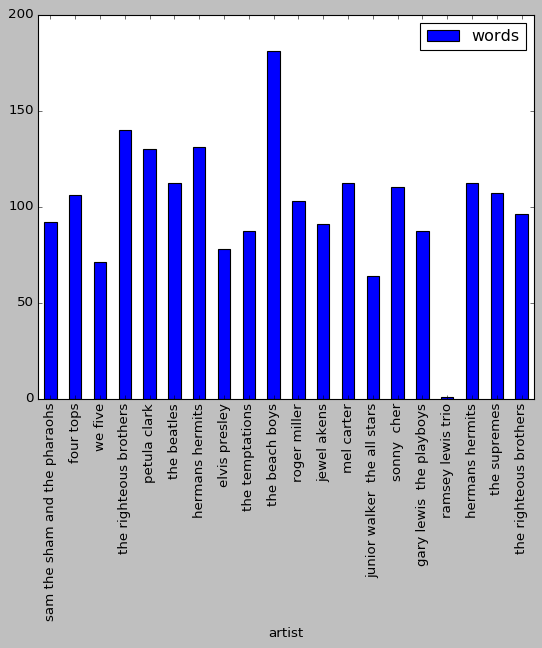

In [36]:
plt.style.use(['fast'])
df.head(20).plot.bar(x='artist',y='words',style='seaborn-talk')
plt.show()

In [ ]:
#adding list to dataframe as column  

In [21]:
plt.rcParams['figure.figsize'] = (50,60)

In [37]:
df['Rank'] = Pd_song_read['Rank']

In [38]:
df['Year'] = (Pd_song_read['Year'])

,artist,words,Rank,Year
0,sam the sham and the pharaohs,92,1.0,1965.0
1,four tops,106,2.0,1965.0
2,we five,71,NaN,NaN
3,the righteous brothers,140,4.0,1965.0
4,petula clark,130,5.0,1965.0
5,the beatles,112,6.0,1965.0
6,hermans hermits,131,7.0,1965.0
7,elvis presley,78,8.0,1965.0
8,the temptations,87,9.0,1965.0
9,the beach boys,181,10.0,1965.0


In [ ]:
#Joining all the lyrics of songs without stop words

In [24]:
#long_string = ','.join(list(Pd_song_read['Lyrics'].values))

In [39]:
long_string = ''.join(list(str(Pd_song_read['stopword_lyrc'].values)))

In [ ]:
#Word Cloud library to create cloud of words 

In [40]:
from wordcloud import WordCloud

In [41]:
wordcloud = WordCloud(background_color="white", max_words=2000, contour_width=5, contour_color='steelblue',width=600,height=800)

In [42]:
WordCloud()

In [43]:
# Generate a word cloud
wordcloud.generate(long_string)


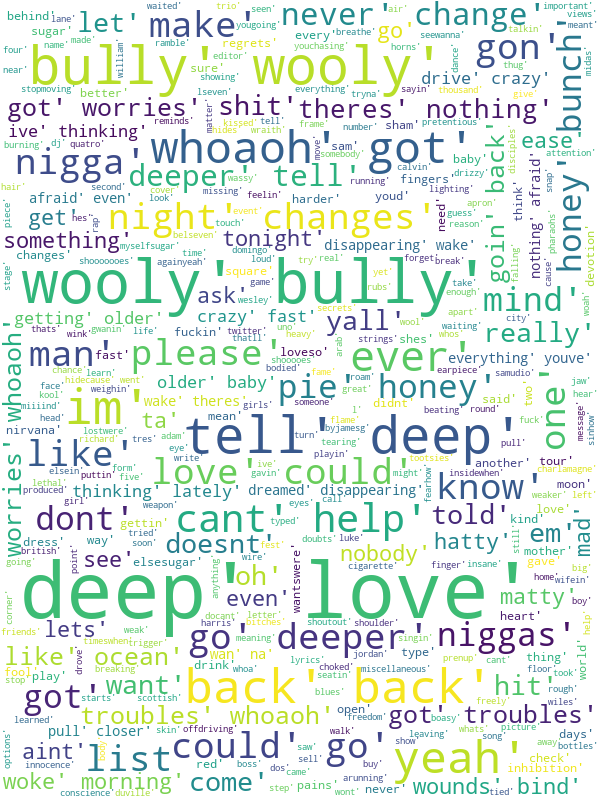

In [44]:
# Visualize the word cloud
wordcloud.to_image()

In [43]:
!pip3 install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [47]:
#function to display top 30 comman words used in lyrics

In [52]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [58]:
Pd_song_read.head(3)

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ...","[sam, sham, miscellaneous, wooly, bully, wooly..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,...","[sugar, pie, honey, bunch, know, love, cant, h..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ...","[woke, morning, mind, mind, got, troubles, who..."


In [54]:
count_vectorizer = CountVectorizer(stop_words='english')

In [55]:
count_data = count_vectorizer.fit_transform(Pd_song_read['Lyrics'])

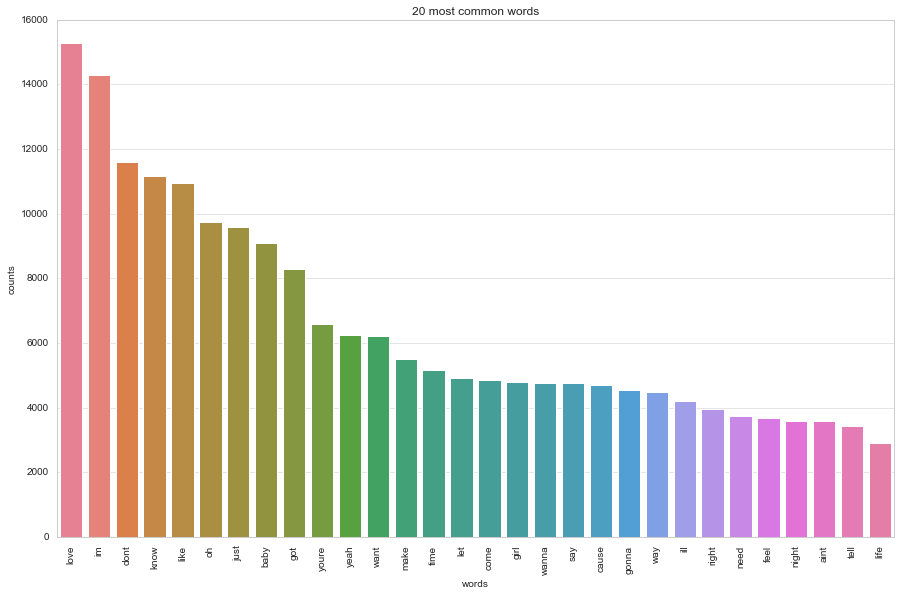

In [56]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [53]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [55]:
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')



[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1045)>


False

In [100]:
Pd_song_read.stopword_lyrc.iloc[0]

['sam',
 'sham',
 'miscellaneous',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'sam',
 'sham',
 'pharaohs',
 'domingo',
 'samudio',
 'uno',
 'dos',
 'one',
 'two',
 'tres',
 'quatro',
 'matty',
 'told',
 'hatty',
 'thing',
 'saw',
 'two',
 'big',
 'horns',
 'wooly',
 'jaw',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'hatty',
 'told',
 'matty',
 'lets',
 'dont',
 'take',
 'chance',
 'lets',
 'belseven',
 'come',
 'learn',
 'dance',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'matty',
 'told',
 'hatty',
 'thats',
 'thing',
 'get',
 'someone',
 'really',
 'pull',
 'wool',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'wooly',
 'bully',
 'lseven',
 'letter',
 'l',
 'number',
 'typed',
 'form',
 'rough',
 'square',
 'lyrics',
 'mean',
 'lets',
 'square']

In [232]:
Pd_song_read[Pd_song_read['Artist']=='the beach boys']

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
10,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,"[well, since, she, put, me, down, i, ve, been,...","[well, since, put, doin, head, come, late, nig..."
48,49,california girls,the beach boys,1965,well east coast girls are hip i really dig tho...,3.0,"[well, east, coast, girls, are, hip, i, really...","[well, east, coast, girls, hip, really, dig, s..."
132,33,good vibrations,the beach boys,1966,ii love the colorful clothes she wears and the...,3.0,"[ii, love, the, colorful, clothes, she, wears,...","[ii, love, colorful, clothes, wears, way, sunl..."
160,61,sloop john b,the beach boys,1966,we come on the sloop john b my grandfather an...,3.0,"[we, come, on, the, sloop, john, b, my, grandf...","[come, sloop, john, b, grandfather, around, na..."
178,79,barbara ann,the beach boys,1966,ba ba ba ba barbara ann ba ba ba ba barbara an...,3.0,"[ba, ba, ba, ba, barbara, ann, ba, ba, ba, ba,...","[ba, ba, ba, ba, barbara, ann, ba, ba, ba, ba,..."
1161,62,rock and roll music,the beach boys,1976,just let me hear some of that rock and roll mu...,3.0,"[just, let, me, hear, some, of, that, rock, an...","[let, hear, rock, roll, music, old, way, choos..."
1692,93,the beach boys medley,the beach boys,1981,the beach boys miscellaneous the beach boys me...,3.0,"[the, beach, boys, miscellaneous, the, beach, ...","[beach, boys, miscellaneous, beach, boys, medl..."
2341,42,kokomo,the beach boys,1988,aruba jamaica ooo i wanna take you bermuda bah...,3.0,"[aruba, jamaica, ooo, i, wan, na, take, you, b...","[aruba, jamaica, ooo, wan, na, take, bermuda, ..."


In [88]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentences=['sugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'love',
 'cant',
 'help',
 'love',
 'nobody',
 'elsein',
 'life',
 'come',
 'go',
 'leaving',
 'picture',
 'behind',
 'kissed',
 'thousand',
 'timeswhen',
 'snap',
 'finger',
 'wink',
 'eye',
 'come',
 'arunning',
 'im',
 'tied',
 'apron',
 'strings',
 'theres',
 'nothing',
 'docant',
 'help',
 'cant',
 'help',
 'myselfsugar',
 'pie',
 'honey',
 'bunch',
 'im',
 'weaker',
 'man',
 'cant',
 'help',
 'im',
 'fool',
 'love',
 'seewanna',
 'tell',
 'dont',
 'love',
 'tell',
 'ive',
 'tried',
 'every',
 'time',
 'see',
 'face',
 'get',
 'choked',
 'insidewhen',
 'call',
 'name',
 'girl',
 'starts',
 'flame',
 'burning',
 'heart',
 'tearing',
 'apart',
 'matter',
 'try',
 'love',
 'hidecause',
 'sugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'im',
 'weak',
 'cant',
 'help',
 'love',
 'nobody',
 'elsesugar',
 'pie',
 'honey',
 'bunch',
 'anything',
 'ask',
 'cant',
 'help',
 'want',
 'nobody',
 'elsesugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'love',
 'cant',
 'help',
 'cant',
 'help']
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 
print (ss)


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}


In [ ]:
#Using nltk check how much percentage of the lyrics of song is positive, negative and neutral

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in artists:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    f = open('lyrics/' + artist + '-cleaned', 'rb')
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    df.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
                 
df.plot.bar(x='artist', stacked=True)
plt.show()          

NameError: name 'artists' is not defined

In [297]:
comp.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
comp1 = []
for artist in Pd_song_read.Artist.head(500):
    f = Pd_song_read.Lyrics.head(500)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        comp1.append(comp)
    
      
    
    pdf_Label.loc[i] = (artist)
    i+=1
    
    
#pdf_Label.plot.bar(x='artist', stacked=True)
#plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            
            
    

In [353]:
!pip install holoviews

    100% |████████████████████████████████| 4.0MB 5.4MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 12.4MB/s ta 0:00:01


In [ ]:
#converting list to Pandas Dataframe

In [59]:
NEW = pd.DataFrame(comp1)

In [60]:
pdf_Label['neg'] = NEW['neg']
pdf_Label['pos'] = NEW['pos']
#pdf_Label['neu'] = NEW['neu']
#pdf_Label['compound'] = NEW['compound']    

In [62]:
pdf_Label.count()

artist    10
pos       10
neu       10
neg       10
dtype: int64

In [354]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

In [358]:
bars = hv.Bars(pdf_Label)


:Bars   [artist]   (pos,neu,neg)

:Bars   [artist]   (pos,neu,neg)


In [ ]:
pd.

In [371]:
pdf_Label.plot.bar(x='artist',stacked=True, figsize=(10,7))

NameError: name 'kwds' is not defined

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

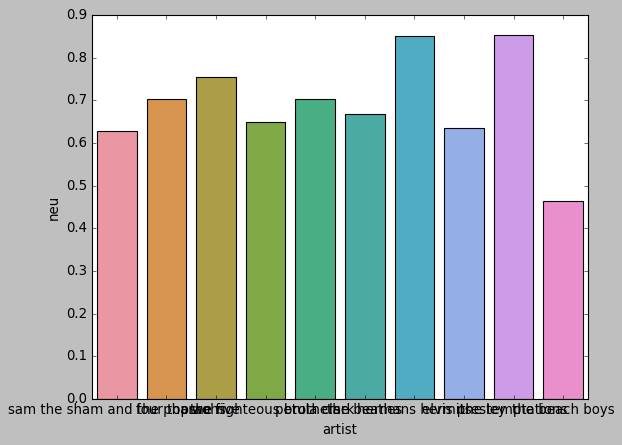

In [383]:
sns.barplot(x=pdf_Label.artist,y=pdf_Label.neu)

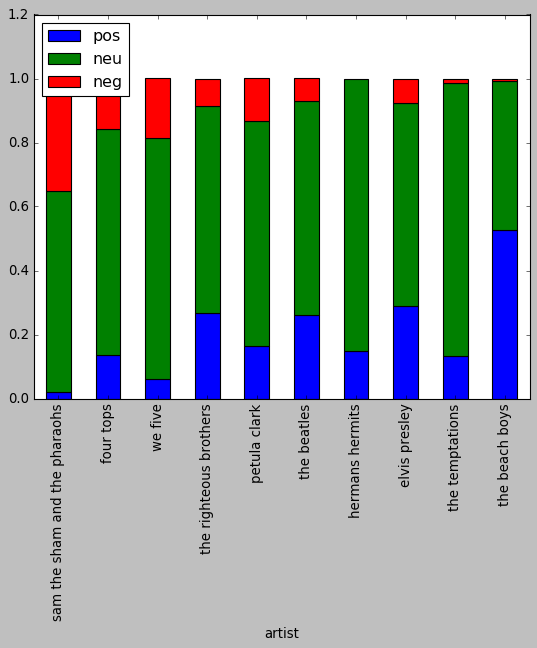

In [350]:
pdf_Label.plot.bar(x='artist', stacked=True,)
plt.show()

sam the sham and the pharaohs 9 4 37
50
18.0
four tops 18 8 74
100
18.0
we five 27 12 111
150
18.0
the righteous brothers 36 16 148
200
18.0
petula clark 45 20 185
250
18.0
the beatles 54 24 222
300
18.0
hermans hermits 63 28 259
350
18.0
elvis presley 72 32 296
400
18.0
the temptations 81 36 333
450
18.0
the beach boys 90 40 370
500
18.0
roger miller 99 44 407
550
18.0
jewel akens 108 48 444
600
18.0
mel carter 117 52 481
650
18.0
junior walker  the all stars 126 56 518
700
18.0
sonny  cher 135 60 555
750
18.0
gary lewis  the playboys 144 64 592
800
18.0
ramsey lewis trio 153 68 629
850
18.0
hermans hermits 162 72 666
900
18.0
the supremes 171 76 703
950
18.0
the righteous brothers 180 80 740
1000
18.0
hermans hermits 189 84 777
1050
18.0
the seekers 198 88 814
1100
18.0
jay and the americans 207 92 851
1150
18.0
the byrds 216 96 888
1200
18.0
sounds orchestral 225 100 925
1250
18.0
barbara mason 234 104 962
1300
18.0
tom jones 243 108 999
1350
18.0
barry mcguire 252 112 1036
1400
18.

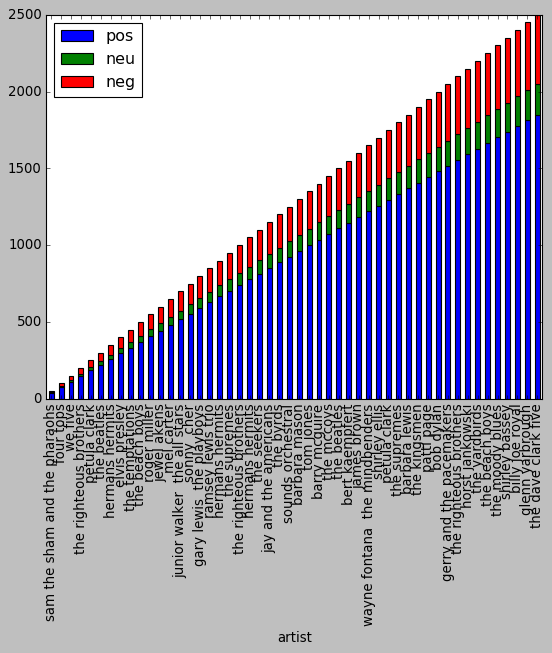

In [272]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
for artist in Pd_song_read.Artist.head(50):
    f = Pd_song_read.Lyrics.head(50)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        
        comp1 = comp['compound']
        if comp1 >= 0.5:
            num_positive += 1
        elif comp1 > -0.5 and comp1 < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
   
    print(artist,num_negative,num_neutral,num_positive)
    num_total = num_negative + num_neutral + num_positive
    print(num_total)
    percent_negative = (num_negative/(num_total))*100
    print(percent_negative)
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    #print(artist,percent_negative,percent_negative,percent_positive)
    pdf_Label.loc[i] = (artist, num_positive, num_neutral, num_negative)
    i+=1
    
    
pdf_Label.plot.bar(x='artist', stacked=True)
plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            

In [268]:
(12/60)*100

20.0

In [249]:
pdf_Label

,artist,pos,neu,neg,comp
0,wooly bully,7,1,2,0.9997
1,i cant help myself sugar pie honey bunch,14,2,4,0.9997
2,you were on my mind,21,3,6,0.9997
3,youve lost that lovin feelin,28,4,8,0.9997
4,downtown,35,5,10,0.9997
5,help,42,6,12,0.9997
6,cant you hear my heart beat,49,7,14,0.9997
7,crying in the chapel,56,8,16,0.9997
8,my girl,63,9,18,0.9997
9,help me rhonda,70,10,20,0.9997


In [200]:
for artist in Pd_song_read.Artist.head(10):
    print(artist)

sam the sham and the pharaohs
four tops
we five
the righteous brothers
petula clark
the beatles
hermans hermits
elvis presley
the temptations
the beach boys


In [204]:
this_sentence

'well since she put me down i ve been out doin in my head come in late at night and in the mornin i just lay in bed well rhonda you look so fine look so fine and i know it wouldnt take much time for you to help me rhonda help me get her out of my heart help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda yeah get her out of my heart she was gonna be my wife and i was gonna be her man but she let another guy come between us and it ruined our plan well rhonda you caught my eye caught my eye and i can give you lotsa reasons why you gotta help me rhonda help me get her out of my heart help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda help help me rhonda help me rhonda yeah get her ou

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in Pd_song_read.Artist:
    num_positive = 0
    num_negative = 0
    num_neutral = 0
    
    f = Pd_song_read.Lyrics
    for sentence in f:
        this_sentence = sentence
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
            
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    pdf_Label.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
    
pdf_Label.head(20).plot.bar(x='artist', stacked=True)
plt.show()          


In [149]:
num_positive=[]
for i in range(2):
    num_positive =+1

In [150]:
num_positive

1

In [36]:
num_words_this

172

In [133]:
pdf_Label

,artist,pos,neu,neg
0,sam the sham and the pharaohs,70.0,10.0,20.0
1,four tops,70.0,10.0,20.0
2,we five,70.0,10.0,20.0
3,the righteous brothers,70.0,10.0,20.0
4,petula clark,70.0,10.0,20.0
5,the beatles,70.0,10.0,20.0
6,hermans hermits,70.0,10.0,20.0
7,elvis presley,70.0,10.0,20.0
8,the temptations,70.0,10.0,20.0
9,the beach boys,70.0,10.0,20.0


In [37]:
num_words

869149

In [130]:
for artist in artists:
    f = open('lyrics/' + artist + '-cleaned', 'rb')
    all_words = ''
    num_words = 0
    raw_text = ""
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        raw_text += this_sentence
            
    words = raw_text.split(" ")
    filtered_words = [word for word in words if word not in stopwords.words('english') and len(word) > 1 and word not in ['na','la']] # remove the stopwords
    
    a = len(set(filtered_words))
    b = len(words)
    df.loc[i] = (artist, (a/float(b))*100)
    i+=1
    


NameError: name 'artists' is not defined

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Lyrics with Genre

In [60]:
Lyrics_Genre = pd.read_csv('lyrics 3.csv')

In [66]:
Lyrics_Genre.dropna(inplace = True)

In [67]:
Lyrics_Genre.count()

index     266556
song      266556
year      266556
artist    266556
genre     266556
lyrics    266556
dtype: int64

In [ ]:
# keep songs have lyrics more than 10
#Taking length of words


In [79]:
df_lyr = pd.DataFrame(columns=('artist_lyr', 'words'))
i=0
for artist in Lyrics_Genre.artist:
    f = Lyrics_Genre.lyrics
    num_words = []
    all_text = ''
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
     
    df_lyr.loc[i] = (artist)
    i+=1

KeyboardInterrupt: 

In [70]:
Lyrics_Genre[len(Lyrics_Genre['lyrics'])]

KeyError: 266556